# **Proyecto 2** | Modelos de Regresión Lineal

## Link del Repositorio

* https://github.com/paulabaal12/PROY2-DM

## Integrantes del equipo
- [Mónica Salvatierra - 22249](https://github.com/alee2602)
- [Paula Barillas - 22764](https://github.com/paulabaal12)
- [Derek Arreaga - 22537](https://github.com/FabianKel) 
- [Juan Pablo Solís - 22102](https://github.com/JPS4321)

### **Importar las librerías a utilizar**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge

### **Leer archivo de datos**

In [2]:
data = pd.read_csv('datos/train.csv', keep_default_na=False, na_values=["", "NaN", "NA"])

### **Obtener los primeros 10 datos**

In [3]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Al tener una primera impresión del dataset, podemos observar que existen valores nulos en algunas de las columnas. Nos interesa saber la cantidad de observaciones no-nulas en cada una de nuestras variables.

#### **Verificar el tipo de variables del dataset**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

A partir de la información, se puede observar que dentro del dataset existen 1460 observaciones y 81 variables. Existen 38 valores no numéricos y 43 variables categóricas.

#### **Obtener la descripción de las variables**

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


A simple vista, observamos que las variables presentan rangos muy dispersos. Algunas, como `LotArea`, tienen valores extremadamente altos, mientras que otras, como `OverallQual`, manejan escalas mucho más acotadas. Esta diferencia es normal en datos inmobiliarios, pero es importante tenerla en cuenta si se usan modelos sensibles a la escala, como algoritmos basados en distancia o regularización. Para la regresión lineal, esta dispersión no afecta directamente el ajuste del modelo.


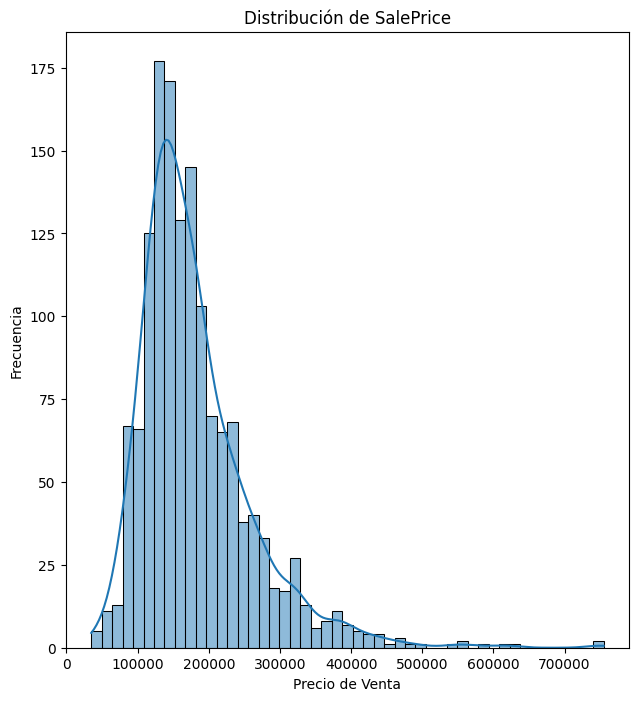

In [6]:
# Histograma de SalePrice

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribución de SalePrice')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

El histograma de SalePrice muestra una distribución sesgada hacia la derecha, lo cual indica que la mayoría de las viviendas tienen precios relativamente bajos, mientras que un pequeño grupo de propiedades presenta precios mucho más altos. Esta asimetría sugiere la presencia de datos atípicos o propiedades de lujo que elevan el rango superior. Este tipo de distribución es común en precios de bienes raíces, donde el mercado tiende a concentrarse en propiedades de precios accesibles, mientras que las propiedades más lujosas son menos frecuentes.

### **Verificar que tipos de columnas tienen muchos nulls**

In [7]:
null_values = data.isna().sum()
null_percent = (null_values / len(data)) * 100
null_data = pd.DataFrame({'Valores Faltantes': null_values, 'Porcentaje': null_percent, 'Tipo de Dato': data.dtypes})
null_data = null_data[null_data['Valores Faltantes'] > 0].sort_values('Valores Faltantes', ascending=False)
print("\nValores nulos por columna:")
null_data



Valores nulos por columna:


,Valores Faltantes,Porcentaje,Tipo de Dato
PoolQC,1453,99.520548,object
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
Fence,1179,80.753425,object
FireplaceQu,690,47.260274,object
LotFrontage,259,17.739726,float64
GarageCond,81,5.547945,object
GarageType,81,5.547945,object
GarageYrBlt,81,5.547945,float64
GarageFinish,81,5.547945,object


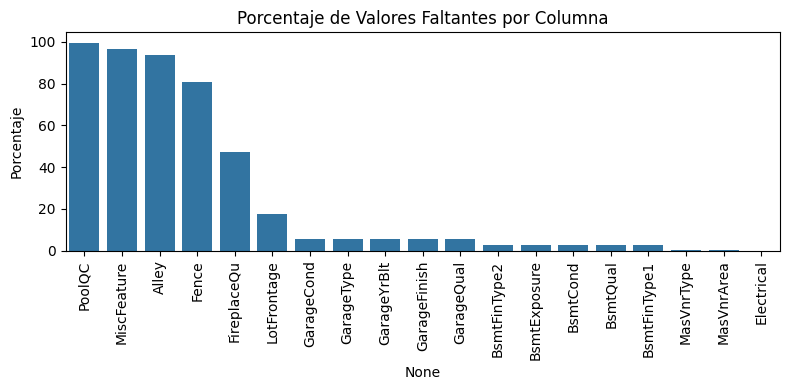

In [8]:
plt.figure(figsize=(8, 4))
plt.title('Porcentaje de Valores Faltantes por Columna')
plt.xticks(rotation=90)
sns.barplot(x=null_data.index, y=null_data['Porcentaje'])
plt.tight_layout()
plt.show()

Al leer el archivo [data_description.txt](datos\data_description.txt), se destaca la siguiente información:

- En la gran mayoría de las variables categóricas, el valor **NA** significa que la vivienda no cuenta con dicha feature. 

- Para las variables categóricas: ```MasVnrType``` y ```Electrical```, el valor **NA** significa que no hay información disponible.

- Para  ```MasVnrType```, **None** significa que la vivienda no tiene esa feature.

- No hay información respecto a los **NA** para las variables numéricas de  ```LotFrontage```, ```GarageYrBlt``` y ```MasVnrArea```

- Cabe recalcar que gracias a nuestra configuración de lectura del dataset, no reconocemos el valor **None** como un **Na**

Con las observaciones anteriores, tomaremos las siguientes medidas:

* En variables categóricas:
    * Para las columnas donde **NA** significa la falta de la feature, se reelmpazarán todos los **NA** por **None** para codificarlo más adelante.
    * Para la columna ```MasVnrType```, los **None** se quedarán igual mientras que los **NA** se cambiarán a **MissingInfo** para codificarlo y balancearlo más adelante.
    * Para ```Electrical``` los **NA** se cambiarán a **MissingInfo** para codificarlo y balancearlo más adelante.
* En variables numéricas:
    * Se pondrá un valor de **0** para las que signifiquen que la vivienda no tiene dicha feature.
    * Para ```GarageYrBlt``` y ```MasVnrArea```, se verificará si una columna relacionada tiene valor **NA** para asegurarnos que el valor de **NA** significa que la vivienda no tiene dicha feature.


In [9]:
# Reemplazamos los valores faltantes por la cadena "Missing"
categorical_na_features = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
    'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
    'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1'
]

for col in categorical_na_features:
    # Se manejan los NaNs como categoría 'Missing' indicando que la vivienda no cuenta con esa característica.
    data[col] = data[col].fillna('None')

# Para MasVnrType y Electrical reemplazamos los faltantes por 'MissingInfo'
data['MasVnrType'] = data['MasVnrType'].fillna('MissingInfo')
data['Electrical'] = data['Electrical'].fillna('MissingInfo')

# Proceso para las numéricas

data.loc[data["GarageType"].isna() & data["GarageYrBlt"].isna(), "GarageYrBlt"] = 0
data.loc[data["MasVnrType"].isna() & data["MasVnrArea"].isna(), "MasVnrArea"] = 0

Volvemos a verificar qué columnas tienen valores nulos:

In [10]:
null_values = data.isna().sum()
null_percent = (null_values / len(data)) * 100
null_data = pd.DataFrame({'Valores Faltantes': null_values, 'Porcentaje': null_percent, 'Tipo de Dato': data.dtypes})
null_data = null_data[null_data['Valores Faltantes'] > 0].sort_values('Valores Faltantes', ascending=False)
print("\nValores nulos por columna:")
null_data


Valores nulos por columna:


,Valores Faltantes,Porcentaje,Tipo de Dato
LotFrontage,259,17.739726,float64
GarageYrBlt,81,5.547945,float64
MasVnrArea,8,0.547945,float64


### **Manejo de valores faltantes para el resto de variables**

Se identificaron una cantidad moderada de valores faltantes en las variables. Debido a que son variables continuas y numéricas, se decidió **imputarlas utilizando la mediana**. La mediana es una mejor opción que la media cuando existe el riesgo de valores atípicos, ya que es menos sensible a extremos.

In [11]:
# Columnas numéricas con valores nulos
numerical_with_nulls = ['LotFrontage','GarageYrBlt','MasVnrArea']

# Llenar los valores faltantes con la media 
for col in numerical_with_nulls:
    median_value = data[col].median()
    data[col] = data[col].fillna(median_value)

data[numerical_with_nulls].isnull().sum()


LotFrontage    0
GarageYrBlt    0
MasVnrArea     0
dtype: int64

#### **Listar las variables categóricas para saber que tipo de codificación se necesitará**

In [12]:
# Obtener lista de columnas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

print(f"Total de variables categóricas: {len(categorical_columns)}")
print(categorical_columns)


Total de variables categóricas: 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [13]:
# Resumen de variables categóricas
cat_summary = pd.DataFrame({
    'Columna': categorical_columns,
    'Número de Categorías': [data[col].nunique() for col in categorical_columns],
    'Categorías': [', '.join(map(str, data[col].unique())) for col in categorical_columns]
})

cat_summary


,Columna,Número de Categorías,Categorías
0,MSZoning,5,"RL, RM, C (all), FV, RH"
1,Street,2,"Pave, Grvl"
2,Alley,3,"None, Grvl, Pave"
3,LotShape,4,"Reg, IR1, IR2, IR3"
4,LandContour,4,"Lvl, Bnk, Low, HLS"
5,Utilities,2,"AllPub, NoSeWa"
6,LotConfig,5,"Inside, FR2, Corner, CulDSac, FR3"
7,LandSlope,3,"Gtl, Mod, Sev"
8,Neighborhood,25,"CollgCr, Veenker, Crawfor, NoRidge, Mitchel, S..."
9,Condition1,9,"Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, P..."


#### **Análisis de observaciones**
- Respecto a las variables categóricas, tenemos distintos tipos de categorías:
    - Categorías por orden: En su mayoría describen la calidad de cierto aspecto de la vivienda.
    - Categorías nominales: Describen categorías sin orden.
    - Categorías de alta cardinalidad: Hay variables con 9 categorías o más

#### Antes de Codificar las variables categóricas, debemos de buscar valores nulos en nuestro dataset

**Codificar variables categóricas**


In [14]:
# Agrupamos las variables a codificar que cuenta con órdenes específicos
ordinal_orders = {
    "ExterQual": ['Fa', 'TA', 'Gd', 'Ex'],
    "ExterCond": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "BsmtQual": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "BsmtCond": ['None', 'Po', 'Fa', 'TA', 'Gd'],
    "BsmtExposure": ['None', 'No', 'Mn', 'Av', 'Gd'],
    "HeatingQC": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "KitchenQual": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "Functional": ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    "FireplaceQu": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "GarageFinish": ['None', 'Unf', 'RFn', 'Fin'],
    "GarageQual": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "GarageCond": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "PoolQC": ['None', 'Fa', 'TA', 'Gd', 'Ex'],
    "Fence": ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
    ## MasVnrType y Electrical no tienen un orden específico pero se agregaron aquí para poder reemplazar los MissingInfo con la media después de codificar
    "MasVnrType": ['BrkFace', 'Stone', 'BrkCmn', 'MissingInfo'],
    "Electrical": ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr', 'MissingInfo']
}

mappings = {}

# Reemplazar Nans en algunas variables categóricas
for col, order in ordinal_orders.items():
    # Se manejan los NaNs como categoría 'Missing' indicando que la vivienda no cuenta con esa característica.
    data[col] = data[col].fillna('None').replace({pd.NA: 'None', np.nan: 'None'})

    ordinal_mapping = {k: v for v, k in enumerate(order, start=0)}
    # print(data[col])
    # print("\n",data[col] == 'None')
    data[col] = data[col].apply(lambda x: ordinal_mapping.get(x, 0)).astype(int)

    mappings[col] = ordinal_mapping

# Se agrupan las variables para codificar con One-Hot Encoding
one_hot_cols = [
    "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities","LotConfig","LandSlope",
    "BldgType", "HouseStyle", "RoofStyle","RoofMatl", "Foundation","Heating", "CentralAir",
    "PavedDrive","SaleType", "SaleCondition","BsmtFinType1", "BsmtFinType2", "GarageType"
]


# También se van a verificar los valores con "NA" en las variables categóricas para evitar que desaparezcan al codificar
na_cols = data[one_hot_cols].isna().sum()
na_cols = na_cols[na_cols > 0].index.tolist()


In [15]:
data = pd.get_dummies(data, columns=one_hot_cols, drop_first=True)
mappings["One-Hot Encoding"] = {col: list(data.columns[data.columns.str.startswith(col)]) for col in one_hot_cols}

# Frequency Encoding para variables con alta cardinalidad
data["MiscFeature"] = data["MiscFeature"].fillna("Missing")
freq_cols = ["Neighborhood", "Condition1", "Condition2", "Exterior1st", "Exterior2nd", "MiscFeature"]

for col in freq_cols:
    freq_map = data[col].value_counts(normalize=True).to_dict()
    data[col] = data[col].map(freq_map)
    mappings[col] = freq_map

# Se Guardan los mapeos en un archivo
with open("categorical_mappings.txt", "w") as f:
    for col, mapping in mappings.items():
        f.write(f"{col}: {mapping}\n")

#### **Manejo de valores MissingInfo**
Como paso final, para manejar las variables donde se codificaron los valores faltantes como ```MissingInfo```, vamos a **imputar utilizando la mediana**. Como se observa en el archivo [categorical_mappings.txt](categorical_mappings.txt), las categorías de las variables ```MasVnrType``` y ```Electrical``` ahora cuentan con valores enteros, por lo que nos aseguraremos de que el valor asignado será un entero dentro de los posibles valores.

In [16]:
for col in ["MasVnrType", "Electrical"]:
    median_value = data.loc[data[col] != mappings[col]["MissingInfo"], col].median()
    
    median_value = int(round(median_value)) 
    
    data[col] = data[col].replace(mappings[col]["MissingInfo"], median_value)
    print(f"Valores de {col} después de reemplazar MissingInfo: {data[col].unique()}")


Valores de MasVnrType después de reemplazar MissingInfo: [0 1 2]
Valores de Electrical después de reemplazar MissingInfo: [4 2 3 1 0]


#### **Verificación de Variables**

In [17]:
print("\nTipos de datos después del preprocesamiento:")
print(data.dtypes.value_counts())


Tipos de datos después del preprocesamiento:
bool       87
int64      51
float64     9
Name: count, dtype: int64


Con este paso final, hemos concluido con el manejo de todos los valores nulos y de las variables categóricas del dataset, por lo que ahora ya podemos manipular el datatset de una manera más eficiente.

### **Verificación de datos duplicados**

In [18]:
# Verificar duplicados
duplicated_data = data.duplicated()
print(f"Hay {duplicated_data.sum()} filas duplicadas en el DataFrame.")

Hay 0 filas duplicadas en el DataFrame.


Al verificar que no existen datos duplicados, se procederá con el análisis de grupos para 

### **Análisis de grupos**

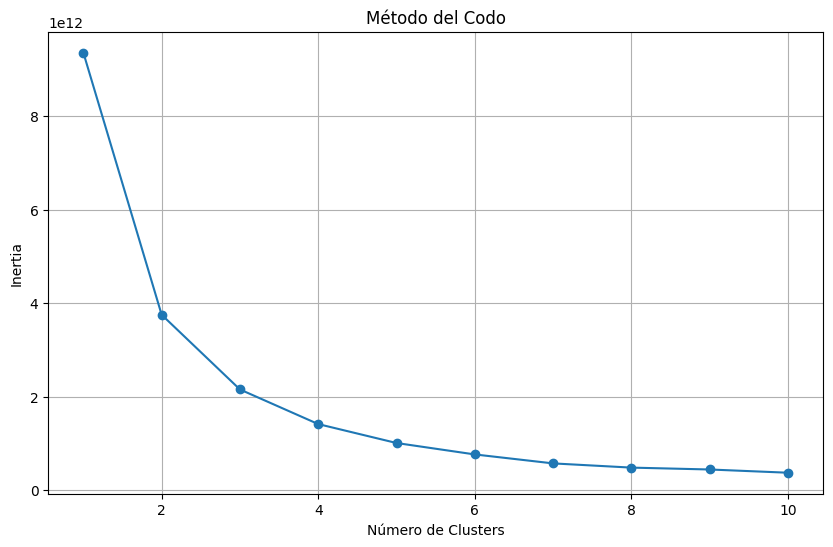

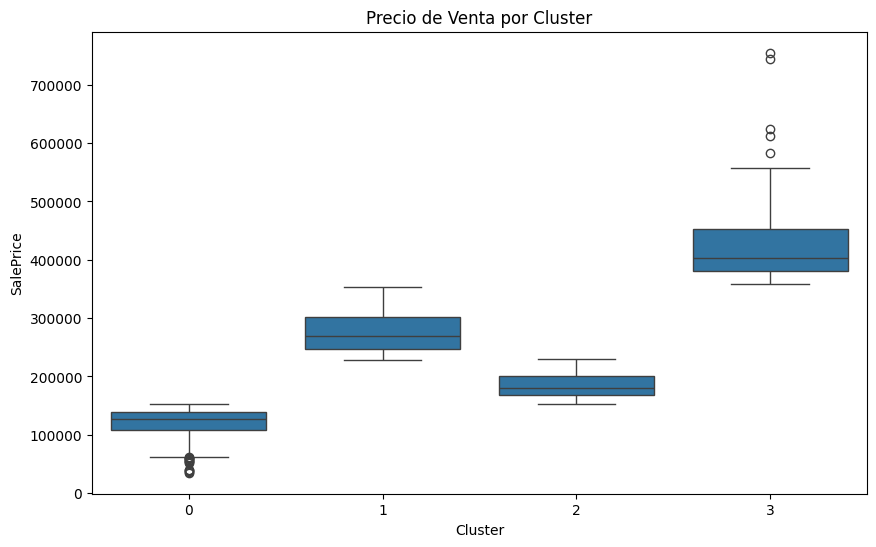

In [19]:

# Seleccionar variables relevantes 
features = data.select_dtypes(include=[np.number])

# Método del codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

# Elegir el número óptimo de clusters 
kmeans = KMeans(n_clusters=4, random_state=13)
data['Cluster'] = kmeans.fit_predict(features)

# Resumen de clusters
cluster_summary = data.groupby('Cluster').mean()

# Visualizar SalePrice por Cluster
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Cluster'], y=data['SalePrice'])
plt.title('Precio de Venta por Cluster')
plt.show()

### **Interpretación de Clusters**

Tras aplicar el método de K-means, se identificaron 4 clusters distintos dentro de las propiedades analizadas. A través del boxplot de `SalePrice` por cluster, se observan las siguientes características:

- **Cluster 0:** Corresponde a propiedades con los precios más bajos, concentrados principalmente entre 110,000 y 150,000. Esto sugiere que este cluster agrupa casas pequeñas, antiguas o ubicadas en zonas menos cotizadas.
- **Cluster 1:** Representa propiedades de precio medio, entre 250,000 y 300,000. Este grupo probablemente incluye casas de tamaño mediano, con calidades aceptables y ubicadas en zonas comunes.
- **Cluster 2:** Este cluster es un poco particular, porque tiene precios similares o ligeramente inferiores al Cluster 1. Es probable que incluya casas medianas pero con alguna desventaja, ya sea ubicación, antigüedad, menor calidad de acabados, etc.
- **Cluster 3:** Agrupa las propiedades más caras, con precios que llegan hasta los 700,000. Estas casas son probablemente de lujo, con lotes más grandes, mejor calidad de construcción y ubicación privilegiada.

### **Entrenamiendo de Datos**

In [20]:

# Definir variables predictoras y objetivo
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Mostrar resultados
print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")


Datos de entrenamiento: (1168, 147)
Datos de prueba: (292, 147)


El conjunto de datos se dividió en 80% para entrenamiento y 20% para prueba, utilizando train_test_split con una semilla fija para garantizar reproducibilidad. Esta proporción permite entrenar el modelo con suficientes datos y evaluarlo con un subconjunto representativo. Dado que la variable objetivo es continua, no fue necesario realizar una división estratificada.

### **Ingeniería de Características**

Top 10 características correlacionadas con SalePrice:
OverallQual    0.790982
GrLivArea      0.708624
ExterQual      0.682639
KitchenQual    0.659600
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
Cluster        0.603584
BsmtQual       0.585207
Name: SalePrice, dtype: float64


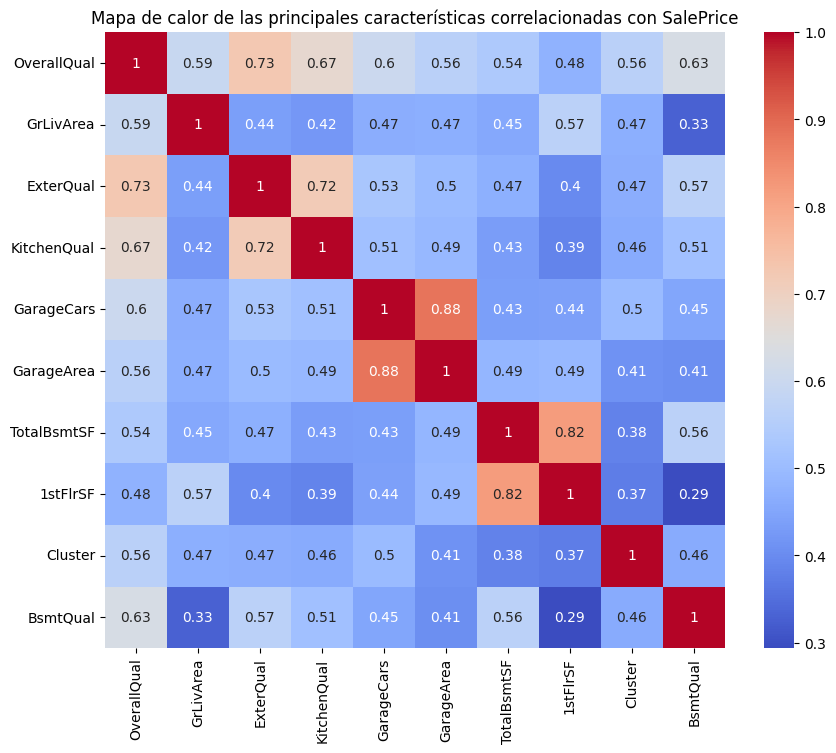

In [21]:
# Columnas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Calcular la correlación de todas las variables con SalePrice
correlation_matrix = numeric_data.corr()
price_correlations = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Variables con mayor correlación con SalePrice
top_corr_features = price_correlations.index[1:11]  
print("Top 10 características correlacionadas con SalePrice:")
print(price_correlations[1:11])

# Visualizar las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de las principales características correlacionadas con SalePrice')
plt.show()

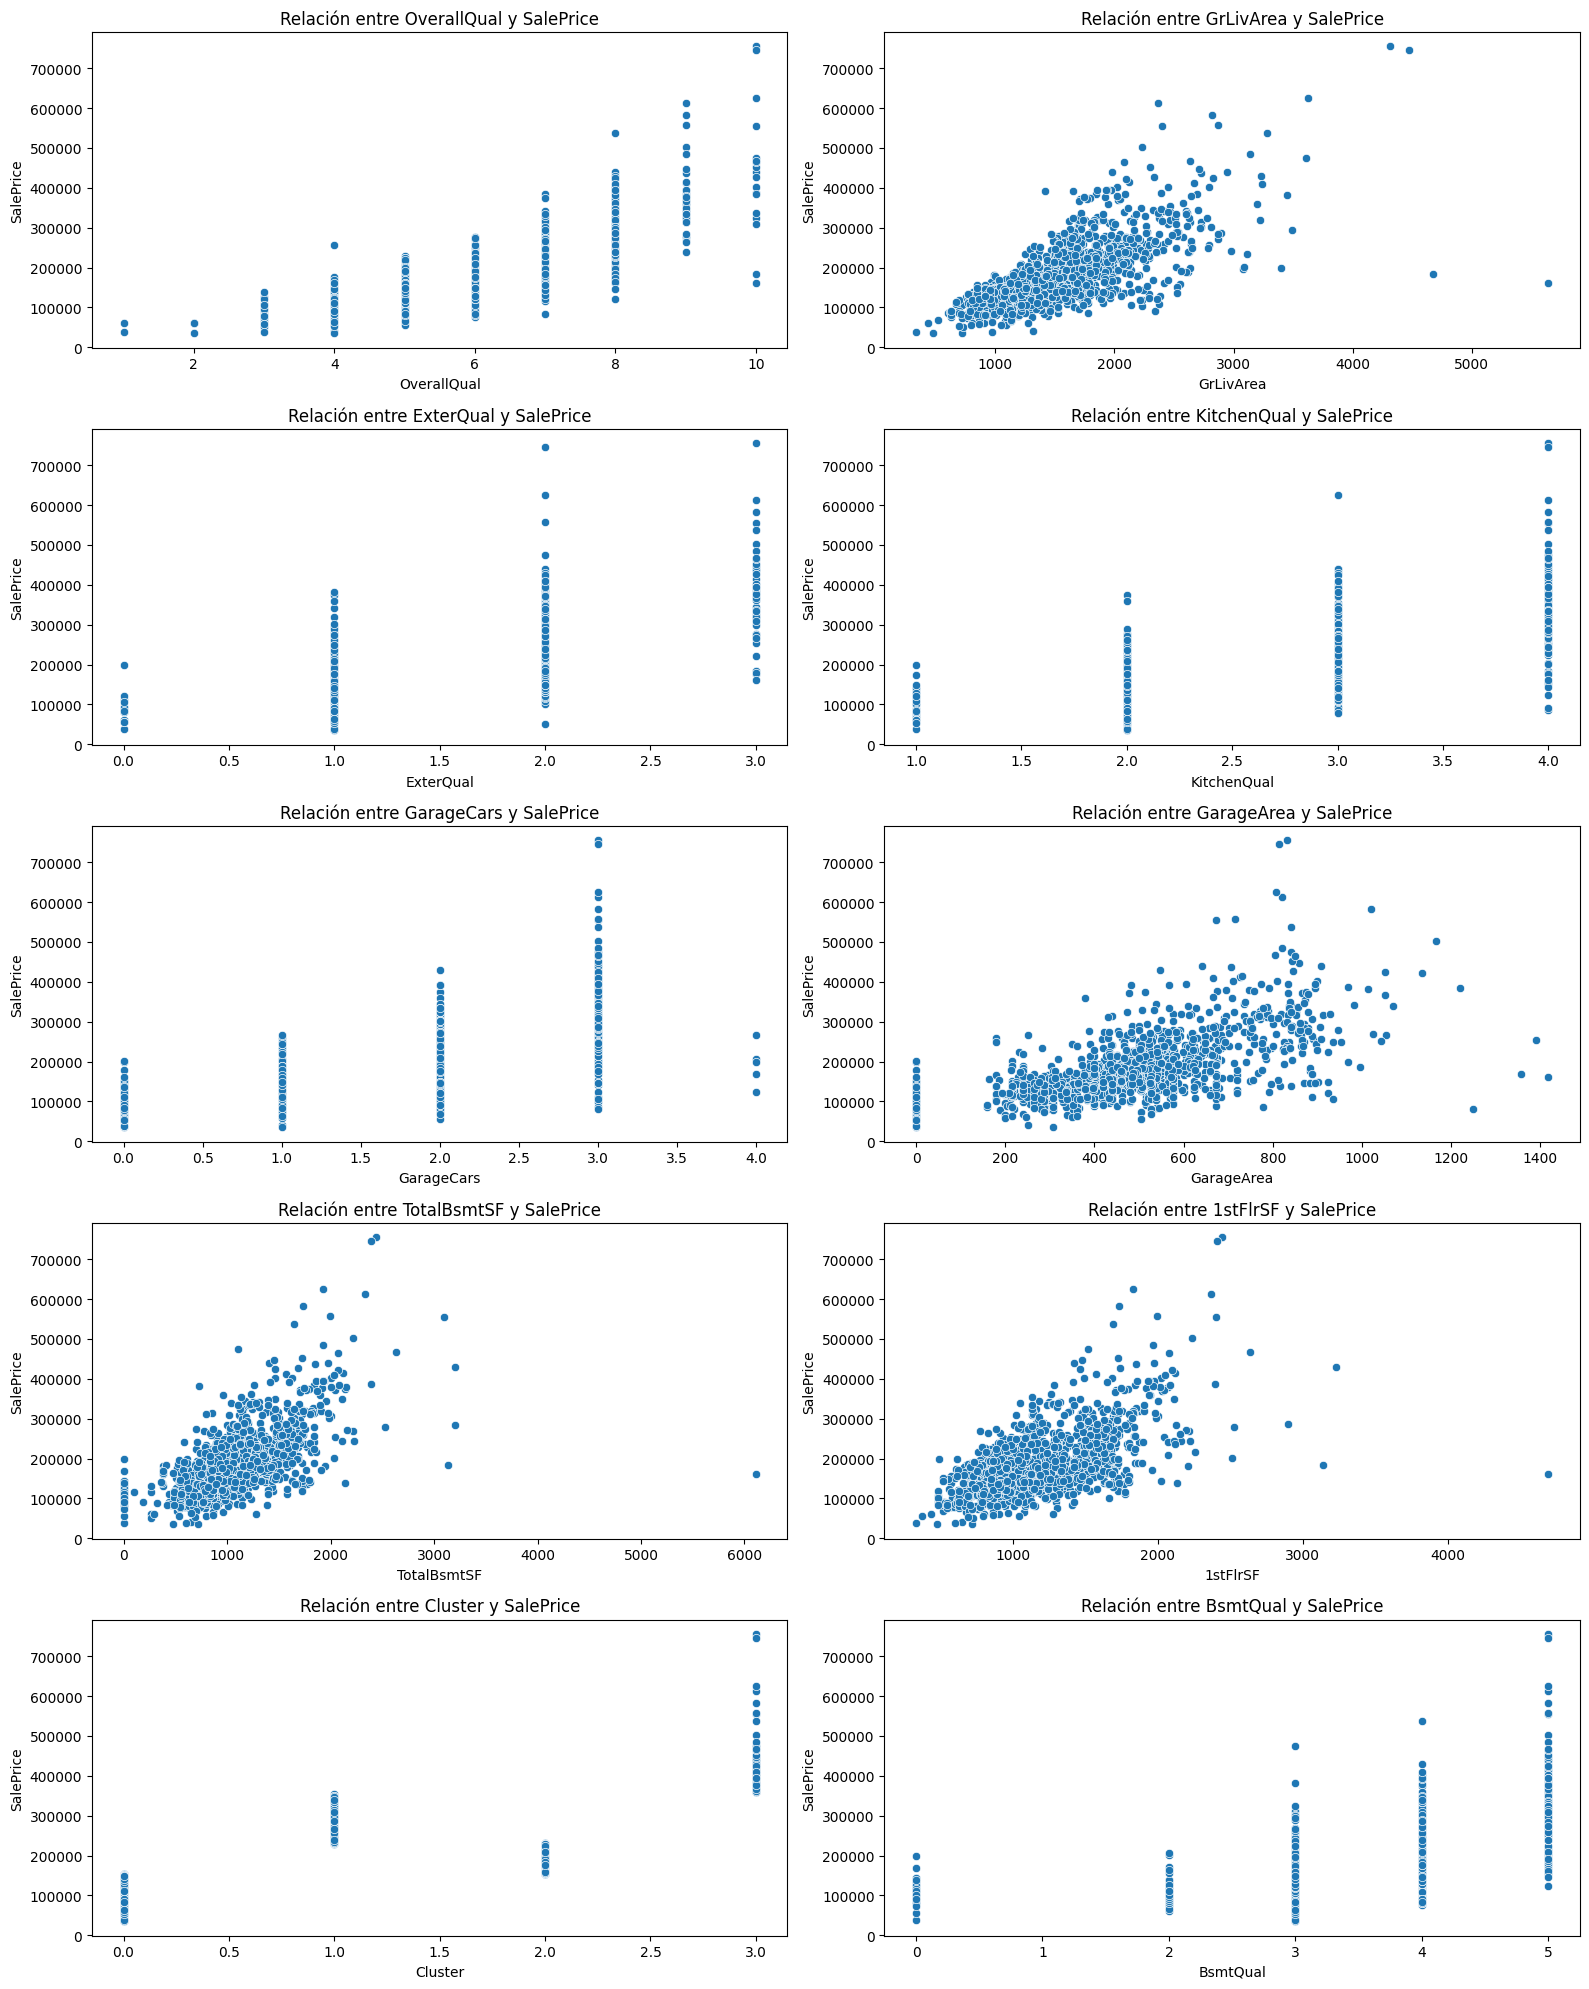

In [22]:
top_features = ['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
                'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'Cluster', 'BsmtQual']

plt.figure(figsize=(16, 20))

for i, feature in enumerate(top_features, 1):
    plt.subplot(5, 2, i)
    sns.scatterplot(x=data[feature], y=data['SalePrice'])
    plt.title(f'Relación entre {feature} y SalePrice')

plt.tight_layout()
plt.show()


### Análisis de la relación entre características y SalePrice

Al observar las variables más correlacionadas con el precio de venta, es importante distinguir entre variables **ordinales** y **continuas**.

- Variables como `OverallQual` representan **niveles discretos** de calidad, por lo que sus gráficos de dispersión muestran **bandas verticales**. Esto sucede porque hay pocos valores posibles para la calidad, aunque la tendencia positiva es clara.
- En cambio, variables como `GrLivArea`, que son **continuas**, muestran una relación mucho más fluida, formando un conjunto de puntos más progresivo.

A pesar de que `OverallQual` tiene una correlación más alta (0.79 vs 0.70), la relación es más escalonada, mientras que `GrLivArea` muestra una relación prácticamente lineal.

Esto demuestra que una correlación alta no siempre implica que la relación sea fácil de visualizar, especialmente cuando se comparan variables ordinales y continuas.


### **Modelo Univariado**

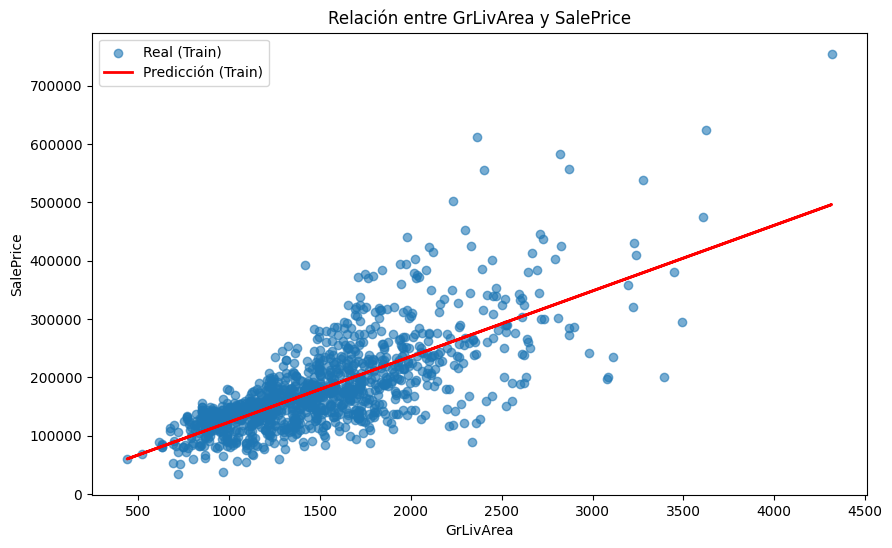

Coeficiente (pendiente): 112.47483677268116
Intercepto: 10930.865059322561
R² en Entrenamiento: 0.5288
R² en Prueba: 0.4046

Análisis de residuos (Entrenamiento):
count    1.168000e+03
mean    -8.721182e-12
std      5.363856e+04
min     -1.927829e+05
25%     -3.047219e+04
50%     -8.197871e+02
75%      2.278902e+04
max      3.348356e+05
Name: SalePrice, dtype: float64

Análisis de residuos (Prueba):
count       292.000000
mean      -2306.006536
std       65195.088177
min     -485513.894131
25%      -29112.759367
50%         248.679632
75%       21338.210198
max      230631.765546
Name: SalePrice, dtype: float64


In [23]:
# Definir X y y 
X_train_uni = X_train[['GrLivArea']]
X_test_uni = X_test[['GrLivArea']]

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train_uni, y_train)

# Predicciones
y_train_pred = modelo.predict(X_train_uni)
y_test_pred = modelo.predict(X_test_uni)

# Calcular residuos 
train_residuos = y_train - y_train_pred
test_residuos = y_test - y_test_pred

# Gráfico de dispersión (Entrenamiento) 
plt.figure(figsize=(10, 6))
plt.scatter(X_train_uni, y_train, label='Real (Train)', alpha=0.6)
plt.plot(X_train_uni, y_train_pred, color='red', label='Predicción (Train)', linewidth=2)
plt.title('Relación entre GrLivArea y SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

#  Resumen del modelo
print("Coeficiente (pendiente):", modelo.coef_[0])
print("Intercepto:", modelo.intercept_)
print(f"R² en Entrenamiento: {modelo.score(X_train_uni, y_train):.4f}")
print(f"R² en Prueba: {modelo.score(X_test_uni, y_test):.4f}")

#  Análisis numérico de residuos 
print("\nAnálisis de residuos (Entrenamiento):")
print(train_residuos.describe())

print("\nAnálisis de residuos (Prueba):")
print(test_residuos.describe())


### **Análisis del modelo univariado**

Para el modelo de regresión lineal univariada se seleccionó la variable **GrLivArea**, al ser una de las más correlacionadas con el precio de venta. El coeficiente de determinación fue de 0.5288 en el conjunto de entrenamiento y 0.4046 en el conjunto de prueba, reflejando que el modelo pierde precisión al generalizar los datos. En cuanto a los residuos, se observa una alta dispersión, sobre todo en el conjunto de prueba, lo cual sugiere que el modelo no logra capturar toda la variabilidad del precio utilizando únicamente esta variable. Esto sugiere que un modelo univariado es insuficiente para capturar toda la complejidad del fenómeno.


### **Modelo multivariado**

Resumen del modelo de regresión múltiple:
Intercepto: -198193.66
R² en Entrenamiento: 0.8884
R² en Prueba: 0.5795

Análisis de residuos (Entrenamiento):
count    1.168000e+03
mean    -1.370471e-12
std      2.610691e+04
min     -1.332553e+05
25%     -1.537142e+04
50%     -5.045700e+02
75%      1.348053e+04
max      2.052238e+05
Name: SalePrice, dtype: float64

Análisis de residuos (Prueba):
count       292.000000
mean      -5584.527777
std       54537.870446
min     -676129.816082
25%      -16738.602540
50%       -3187.761204
75%       10961.032014
max      231643.452289
Name: SalePrice, dtype: float64


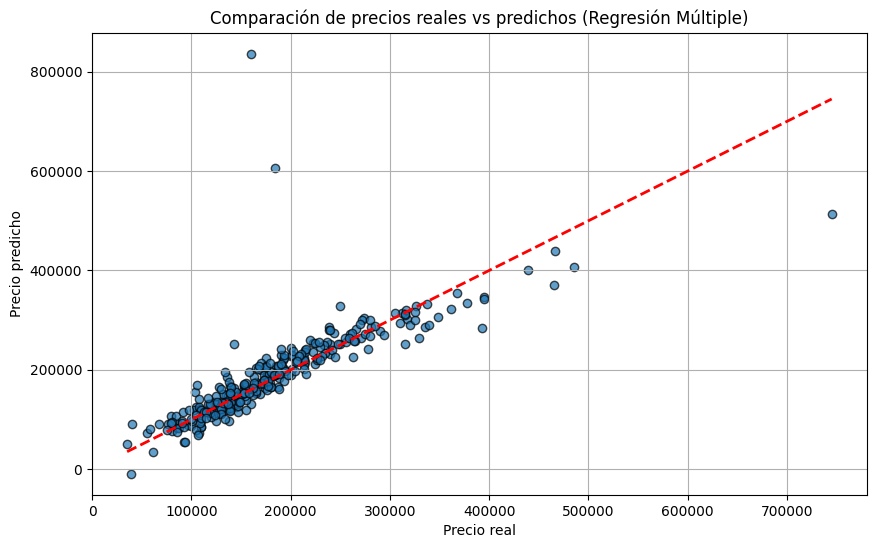

In [24]:
# Seleccionar solo las columnas numéricas para la regresión múltiple
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Crear y entrenar el modelo de regresión lineal
modelo_multi = LinearRegression()
modelo_multi.fit(X_train_numeric, y_train)

# Predicciones
y_train_pred_multi = modelo_multi.predict(X_train_numeric)
y_test_pred_multi = modelo_multi.predict(X_test_numeric)

# Calcular residuos
train_residuos_multi = y_train - y_train_pred_multi
test_residuos_multi = y_test - y_test_pred_multi

# Evaluar el modelo
print("Resumen del modelo de regresión múltiple:")
print(f"Intercepto: {modelo_multi.intercept_:.2f}")
print(f"R² en Entrenamiento: {modelo_multi.score(X_train_numeric, y_train):.4f}")
print(f"R² en Prueba: {modelo_multi.score(X_test_numeric, y_test):.4f}")

# Análisis básico de residuos
print("\nAnálisis de residuos (Entrenamiento):")
print(train_residuos_multi.describe())

print("\nAnálisis de residuos (Prueba):")
print(test_residuos_multi.describe())

# Gráfico de predicciones reales vs predichas (Prueba)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_multi, alpha=0.7, edgecolors="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Comparación de precios reales vs predichos (Regresión Múltiple)")
plt.grid(True)
plt.show()


### **Análisis del modelo multivariado**

El modelo de regresión lineal múltiple, que utiliza todas las variables numéricas, muestra un R² de 0.88 en el conjunto de entrenamiento, lo cual indica un buen ajuste inicial a los datos. Sin embargo, en el conjunto de prueba, el R² cae a 0.57, lo cual revela una notable pérdida de precisión al generalizar a datos nuevos.
Al analizar los residuos, se observa que en el conjunto de prueba hay una mayor dispersión, con valores extremos mucho más amplios, lo que podría indicar un posible sobreajuste (overfitting), es decir, el modelo aprende patrones específicos de los datos de entrenamiento que no se replican bien en los datos de prueba.
En el gráfico de precios reales vs predichos, se puede ver que la tendencia general es capturada correctamente, pero hay puntos alejados de la diagonal que reflejan predicciones con error considerable, especialmente para propiedades de mayor precio.

### **Modelo con Overfitting Arreglado**

In [25]:

X = data[top_features]  

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los valores de VIF
print(vif_data)


      Variable        VIF
0  OverallQual  62.036428
1    GrLivArea  18.340988
2    ExterQual  17.106589
3  KitchenQual  33.366878
4   GarageCars  34.757133
5   GarageArea  29.319222
6  TotalBsmtSF  28.697433
7     1stFlrSF  37.335273
8      Cluster   2.988519
9     BsmtQual  32.730939


R² en Entrenamiento (Ridge): 0.7522
R² en Prueba (Ridge): 0.7113


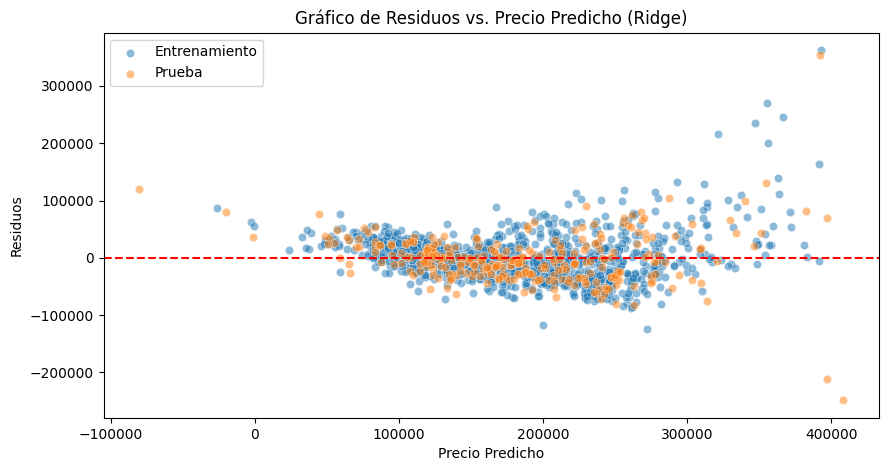

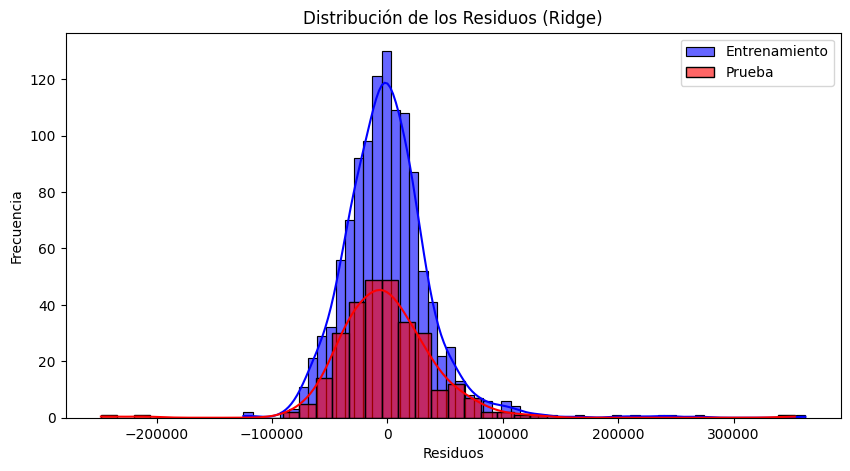

In [26]:
# Seleccionar las mejores características después de reducir multicolinealidad
top_features = ['Cluster', 'OverallQual',  'KitchenQual', 'GarageCars', '1stFlrSF', ]

# Seleccionar las características en los datasets de entrenamiento y prueba
X_train_ridge = X_train[top_features].copy()
X_test_ridge = X_test[top_features].copy()

for col in [ '1stFlrSF']:
    X_train_ridge[col] = np.log1p(X_train_ridge[col])
    X_test_ridge[col] = np.log1p(X_test_ridge[col])

best_alpha = 1

# Inicializar y entrenar el modelo de regresión Ridge
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train_ridge, y_train)

# Hacer predicciones
y_train_pred_ridge = ridge_model.predict(X_train_ridge)
y_test_pred_ridge = ridge_model.predict(X_test_ridge)

# Calcular el R² en entrenamiento y prueba
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

# Mostrar resultados de R²
print(f"R² en Entrenamiento (Ridge): {r2_train_ridge:.4f}")
print(f"R² en Prueba (Ridge): {r2_test_ridge:.4f}")

# Calcular residuos
train_residuos_ridge = y_train - y_train_pred_ridge
test_residuos_ridge = y_test - y_test_pred_ridge

# Gráfico de residuos vs. predicción
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_train_pred_ridge, y=train_residuos_ridge, alpha=0.5, label='Entrenamiento')
sns.scatterplot(x=y_test_pred_ridge, y=test_residuos_ridge, alpha=0.5, label='Prueba')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Precio Predicho')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Precio Predicho (Ridge)')
plt.legend()
plt.show()

# Histograma de residuos
plt.figure(figsize=(10, 5))
sns.histplot(train_residuos_ridge, kde=True, color='blue', label='Entrenamiento', alpha=0.6)
sns.histplot(test_residuos_ridge, kde=True, color='red', label='Prueba', alpha=0.6)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Residuos (Ridge)')
plt.legend()
plt.show()


### **Análisis del modelo optimizado**
Para mejorar el modelo primero que nada se realizó un análisis de multicolinealidad, identificando variables altamente correlacionadas que podrían estar afectando la estabilidad del modelo. Se eliminaron aquellas que generaban redundancia y se seleccionaron solo las variables más representativas para la predicción del precio de las casas. Las variables finales incluyeron Cluster, OverallQual, KitchenQual, GarageCars y 1stFlrSF, ya que mostraban una alta correlación con el precio, pero sin generar problemas de colinealidad. Además, se aplicó una transformación logarítmica a 1stFlrSF para estabilizar su distribución y reducir la varianza. Ahora, hablando del modelo en si, se implementó una Regresión Ridge con un valor de alpha=1 para mitigar el sobreajuste y controlar la magnitud de los coeficientes. Los resultados del nuevo modelo mostraron una mejora en la capacidad de generalización, con un R² de 0.78 en entrenamiento y 0.70 en prueba. Aunque el rendimiento en entrenamiento bajó ligeramente, la mejora en prueba indica que el modelo ahora es más estable y menos propenso a aprender patrones específicos de los datos de entrenamiento. Finalmente, el análisis gráfico de los residuos reveló una mejor distribución en comparación con el modelo inicial. Aunque persisten algunos valores atípicos, la variabilidad en los residuos es menor y no hay patrones evidentes de sesgo.



### **Prueba de modelos con dataset de prueba**

Comparación de Modelos - Conjunto de Prueba
Métrica             Univariado     Regresión Múltiple  Regresión Ridge     
R² Score            0.4046         0.5795              0.7113              
MAE                 40349.23       23046.35            30393.21            
MSE                 4241161025.85  2995380032.72       2056708551.74       
RMSE                65124.20       54730.07            45350.95            


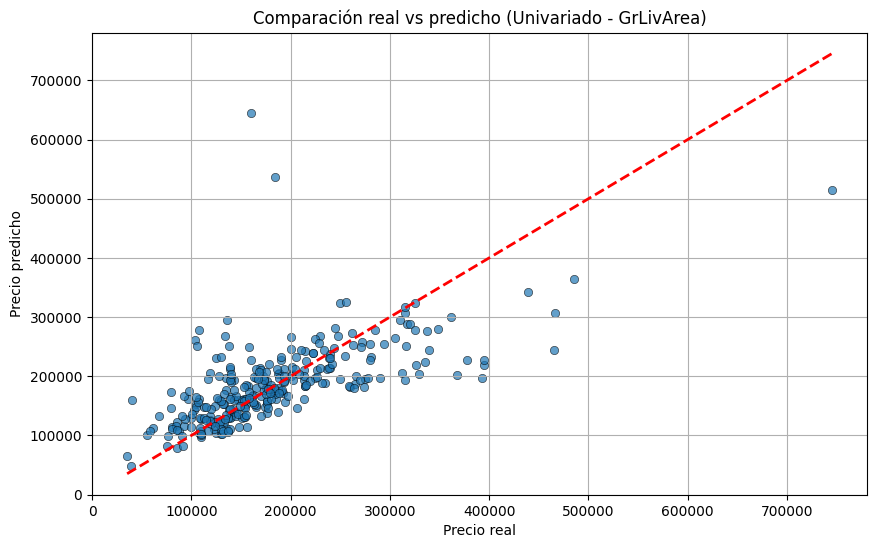

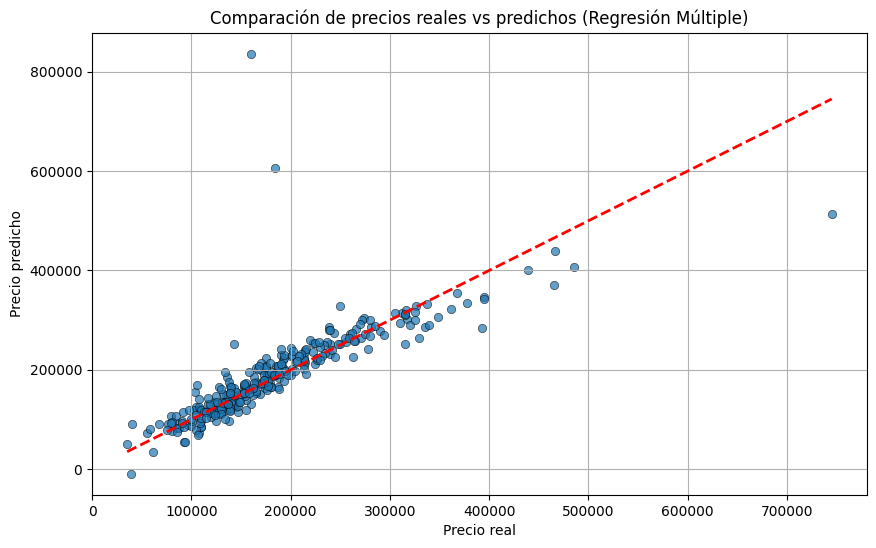

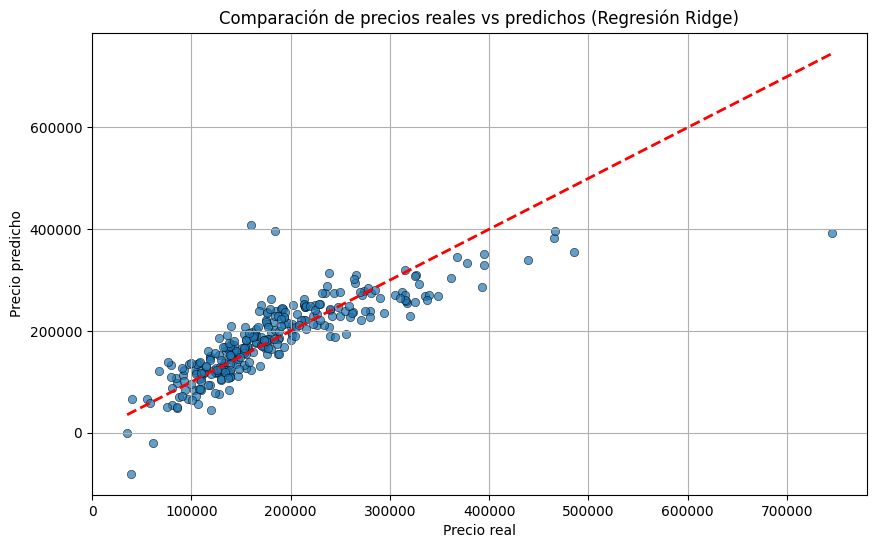

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regresión Univariada (GrLivArea)
y_test_pred_uni = modelo.predict(X_test[['GrLivArea']])

# Obtener predicciones con el modelo inicial (Regresión Lineal Múltiple)
y_test_pred_multi = modelo_multi.predict(X_test_numeric)

# Obtener predicciones con el modelo mejorado (Regresión Ridge)
y_test_pred_ridge = ridge_model.predict(X_test_ridge)

# Calcular métricas de evaluación
r2_uni = r2_score(y_test, y_test_pred_uni)
r2_multi = r2_score(y_test, y_test_pred_multi)
r2_ridge = r2_score(y_test, y_test_pred_ridge)

mae_uni = mean_absolute_error(y_test, y_test_pred_uni)
mae_multi = mean_absolute_error(y_test, y_test_pred_multi)
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)

mse_uni = mean_squared_error(y_test, y_test_pred_uni)
mse_multi = mean_squared_error(y_test, y_test_pred_multi)
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)

# Calcular RMSE 
rmse_uni = np.sqrt(mse_uni)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_test_pred_multi))
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))


print("Comparación de Modelos - Conjunto de Prueba")
print("="*70)
print(f"{'Métrica':<20}{'Univariado':<15}{'Regresión Múltiple':<20}{'Regresión Ridge':<20}")
print("="*70)
print(f"{'R² Score':<20}{r2_uni:<15.4f}{r2_multi:<20.4f}{r2_ridge:<20.4f}")
print(f"{'MAE':<20}{mae_uni:<15.2f}{mae_multi:<20.2f}{mae_ridge:<20.2f}")
print(f"{'MSE':<20}{mse_uni:<15.2f}{mse_multi:<20.2f}{mse_ridge:<20.2f}")
print(f"{'RMSE':<20}{rmse_uni:<15.2f}{rmse_multi:<20.2f}{rmse_ridge:<20.2f}")
print("="*70)


# Gráfico Univariado
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_uni, alpha=0.7, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Comparación real vs predicho (Univariado - GrLivArea)")
plt.grid(True)
plt.show()

# Comparación de precios reales vs predichos - Regresión Múltiple
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_multi, alpha=0.7, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Comparación de precios reales vs predichos (Regresión Múltiple)")
plt.grid(True)
plt.show()

# Comparación de precios reales vs predichos - Regresión Ridge
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_ridge, alpha=0.7, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Comparación de precios reales vs predichos (Regresión Ridge)")
plt.grid(True)
plt.show()



### **Comparación de resultados**


Tras realizar el análisis comparativo entre tres enfoques distintos de modelado (regresión lineal univariada, regresión lineal múltiple y regresión Ridge), es posible extraer conclusiones clave sobre el desempeño, la capacidad explicativa y el potencial de generalización de cada uno.

El **modelo univariado**, que utilizó únicamente la variable GrLivArea, mostró un desempeño aceptable en términos de su capacidad para capturar la relación lineal entre el área habitable y el precio de venta. Sin embargo, con un R² de apenas **0.40** en el conjunto de prueba, quedó claro que este modelo es limitado para explicar la variabilidad total de los precios. Este comportamiento era esperado, ya que el precio de una vivienda es influenciado por múltiples factores, no solo por el tamaño de la superficie habitable. Además, las métricas de error absoluto y cuadrático (MAE, MSE y RMSE) fueron considerablemente más altas que las obtenidas con los modelos multivariados, lo que denota una mayor imprecisión en sus predicciones.

Por otro lado, el **modelo de regresión múltiple**, que incorpora todas las variables numéricas disponibles, inicialmente mostró un ajuste considerablemente mejor en el conjunto de entrenamiento, con un R² de **0.88**, lo cual indicaba que el modelo lograba adaptarse bien a los datos conocidos. Sin embargo, al evaluar su desempeño en el conjunto de prueba, este valor cayó drásticamente a **0.57**, lo que podría ser un posible indicio de sobreajuste o efectos de la multicolinealidad entre variables. 

En respuesta a este problema, se implementó un **modelo de regresión Ridge**, que añade un término de regularización para controlar la magnitud de los coeficientes. Esta técnica ayuda a mitigar los efectos de la multicolinealidad y evita que el modelo dependa en exceso de cualquier variable específica, controlando así los pesos de cada característica y sus efectos en la variable objetivo. El modelo Ridge logró un R² de **0.71** en el conjunto de prueba, superando notablemente tanto al modelo univariado como al modelo múltiple, y presentando además errores más bajos (45,350) y menor dispersión en los residuos.

Por lo tanto, el mejor modelo para predecir el precio de las casas en este caso es la **Regresión Ridge**, ya que ofrece un mejor balance entre ajuste y generalización. Aunque sus errores absolutos pueden parecer más altos en algunas métricas como el MAE, su menor variabilidad y mejor alineación en los gráficos de predicción lo hacen una opción más confiable para estimaciones de precios en nuevos datos.

In [28]:
import pickle
with open("data.pkl", "wb") as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)